# Pneumatic Force Applicator Machine (PFAM)

The Pneumatic Force Applicator Machine (PFAM) is a mechanical system engineered to deliver a consistent and adjustable tapping force to a sample, with force and frequency control.

I developed and constructed the PFAM during my PhD thesis to evaluate the power conversion efficiency of mechanical energy converters. The system utilizes a pneumatic cylinder governed by an Arduino, enabling precise force control for accurate mechanical characterization tests. For detailed construction instructions and an in-depth explanation of PFAM's functionality, follow this [link](https://custom-prolabtools.blogspot.com/p/pneumatic-force-applicator-machine-pfam.html).

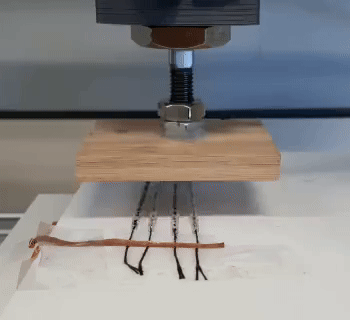

Calibration was performed using a Burster Tension and Compression Cell to measure the applied force.

The results of force measurements under varying pressure conditions are documented in this notebook.

In [3]:
#import pandas lybrary
import pandas as pd

In [7]:
#defining the csv files paths from force measurements
f20_2 = "C:/Users/Utilizador/Documents/GitHub/PhD_reports/force_measure_files/20N2Hz.csv"

In [5]:
#importing the content of the first csv file into a df pandas dataframe
df = pd.read_csv(f20_2)
df

,1,0.00082,-0.2
0,2,0.00164,-0.1
1,3,0.00246,0.0
2,4,0.00328,-0.2
3,5,0.00410,0.0
4,6,0.00492,0.0
...,...,...,...
245094,245096,204.20530,19.7
245095,245097,204.20610,19.8
245096,245098,204.20700,19.8
245097,245099,204.20780,19.7


We can see that the file contain 3 columns: an index, the relative time (starting at 0 sec) and the actual force measurement (in Newtons).

Some of the "problems" of this csv file are:

1. The fisrt column is an index, so now the dataframe has 2x columns which are indices.

2. The columns have no headers so the first data value was interpreted as an header name.

Since the all measuring files are exported using the same format, all files are affected by this.

Let's adress the issues.

In [20]:
#Starting by creating a list with all the files names

#creating a list with file names
import os

#this is the folder directory where all files are saved
csv_directory = "C:/Users/Utilizador/Documents/GitHub/PhD_reports/force_measure_files/"

#creat an empty list of file names
csv_files = []

#use os lybrary to find all file directories and save them on cvs_list
for file in os.listdir(csv_directory):  # Iterate through all items in the directory
    if file.endswith('.csv'):  # Check if the item is a CSV file
        csv_files.append(file)  # Add it to the list if it is

csv_files

['20N2Hz.csv',
 '30N05Hz.csv',
 '30N1Hz.csv',
 '30N2Hz.csv',
 '30N3Hz.csv',
 '40N2Hz.csv',
 '50N2Hz.csv',
 '75N2Hz.csv']

Let's separate the list in two diferent lists, one for files with increasing forces (N), other for files with increasing frequencies (Hz).

In [35]:
force = '2Hz' #different forces with the same frequency of 2Hz
freq = '30N' #different frequencies with the same force of 30N
force_files = []
freq_files = []

for file in csv_files:
    if force in file:
        force_files.append(file)
    if freq in file:
        freq_files.append(file)

print("~ force file names: ", force_files)
print("~ frequency file names: ", freq_files)

~ force file names:  ['20N2Hz.csv', '30N2Hz.csv', '40N2Hz.csv', '50N2Hz.csv', '75N2Hz.csv']
~ frequency file names:  ['30N05Hz.csv', '30N1Hz.csv', '30N2Hz.csv', '30N3Hz.csv']


In [67]:
force_files

['20N2Hz.csv', '30N2Hz.csv', '40N2Hz.csv', '50N2Hz.csv', '75N2Hz.csv']

Now that we have a list of file names that consists on the data that we pretend to combine for visualization later, lets build a dataframe consisting of the combination of all force files.

In [74]:
force_df = pd.DataFrame()

# Loop through each CSV file and append it to the combined DataFrame
for file in force_files:
    # 1 - construct a new file path through each iteration
    file_path = os.path.join(csv_directory, file)
    
    # 2 - import the content to a temporary dataframe temp_def
    temp_df = pd.read_csv(file_path, header=None)
        # note 2.2: using "header=None" to solve problem number 2 - csv with no original headers
    temp_df = temp_df.drop(temp_df.columns[0], axis=1)
        # note 2.1: using .drop() to solve problem number 1 - duplicate index in dataframe
    
    # 3 - rename the headers
    temp_df.columns = temp_df.columns.astype(str)
    temp_df.columns = [f"t_{file.split('.')[0]}", f"F_{file.split('.')[0]}"]
    
    
    # 4 - combine the data into the final dataframme                                  
    force_df = pd.concat([force_df, temp_df], axis=1)
    
force_df

,t_20N2Hz,F_20N2Hz,t_30N2Hz,F_30N2Hz,t_40N2Hz,F_40N2Hz,t_50N2Hz,F_50N2Hz,t_75N2Hz,F_75N2Hz
0,0.00082,-0.2,0.00082,0.0,0.00082,0.0,0.00082,0.0,0.00082,-0.1
1,0.00164,-0.1,0.00164,0.1,0.00164,0.0,0.00164,0.0,0.00164,0.0
2,0.00246,0.0,0.00246,0.0,0.00246,0.0,0.00246,-0.1,0.00246,0.0
3,0.00328,-0.2,0.00328,-0.1,0.00328,0.0,0.00328,-0.1,0.00328,0.1
4,0.00410,0.0,0.00409,0.1,0.00410,-0.2,0.00410,-0.2,0.00410,0.0
...,...,...,...,...,...,...,...,...,...,...
276445,NaN,NaN,NaN,NaN,NaN,NaN,230.35240,51.4,NaN,NaN
276446,NaN,NaN,NaN,NaN,NaN,NaN,230.35320,51.4,NaN,NaN
276447,NaN,NaN,NaN,NaN,NaN,NaN,230.35400,51.5,NaN,NaN
276448,NaN,NaN,NaN,NaN,NaN,NaN,230.35480,51.7,NaN,NaN


Now we can see that there are a lot of NaN values. This is due to the fact that the original files were recorded using diferent time lenghts.

Since the files are quite long and have loads of information in it, we can opt to simply trim the dataframe to eliminate the issue.


In [75]:
force_df_ = force_df[0:230000]
force_df_

,t_20N2Hz,F_20N2Hz,t_30N2Hz,F_30N2Hz,t_40N2Hz,F_40N2Hz,t_50N2Hz,F_50N2Hz,t_75N2Hz,F_75N2Hz
0,0.00082,-0.2,0.00082,0.0,0.00082,0.0,0.00082,0.0,0.00082,-0.1
1,0.00164,-0.1,0.00164,0.1,0.00164,0.0,0.00164,0.0,0.00164,0.0
2,0.00246,0.0,0.00246,0.0,0.00246,0.0,0.00246,-0.1,0.00246,0.0
3,0.00328,-0.2,0.00328,-0.1,0.00328,0.0,0.00328,-0.1,0.00328,0.1
4,0.00410,0.0,0.00409,0.1,0.00410,-0.2,0.00410,-0.2,0.00410,0.0
...,...,...,...,...,...,...,...,...,...,...
229995,191.62490,17.6,191.65190,0.0,191.62560,0.1,191.65270,0.1,191.68100,0.2
229996,191.62580,17.8,191.65270,0.2,191.62650,0.2,191.65350,0.1,191.68180,0.2
229997,191.62660,17.7,191.65350,0.0,191.62730,0.2,191.65440,0.0,191.68270,0.0
229998,191.62740,17.8,191.65440,0.1,191.62820,0.2,191.65520,0.1,191.68350,0.0


Let's try to visualize the first file.

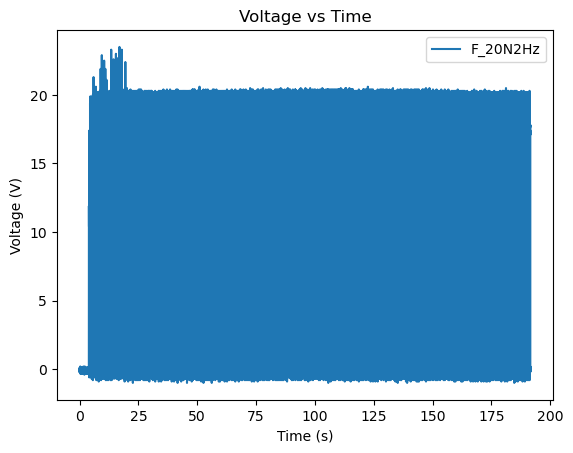

In [76]:
import matplotlib.pyplot as plt

force_df_.plot(x='t_20N2Hz', y='F_20N2Hz', kind='line')

plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Time')

plt.show()

Some notes:

- The aproximate force seems to be 20 N.
- We should plot a smal time interval to better understant the data.
- The initial data is not relevant since the user was tunning the pressure to adjust the force to 20 N.

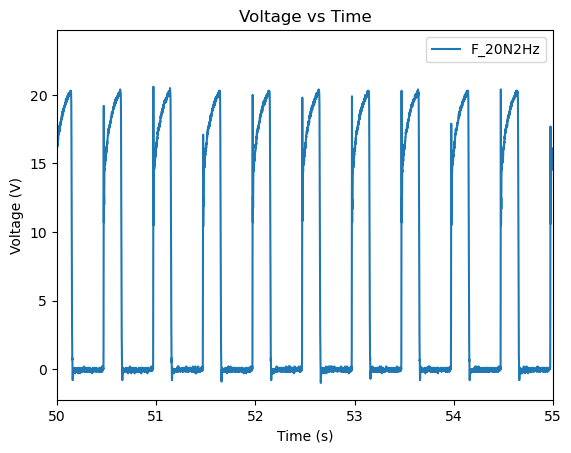

In [85]:
force_df_.plot(x='t_20N2Hz', y='F_20N2Hz', kind='line')

plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Time')
plt.xlim(50, 55)

plt.show()

Now we can plot the other measurements.

### Ploting the force profile of PFAM using forces from 20 N to 75 N at 2Hz

Text(0.5, 1.0, 'Force vs Time')

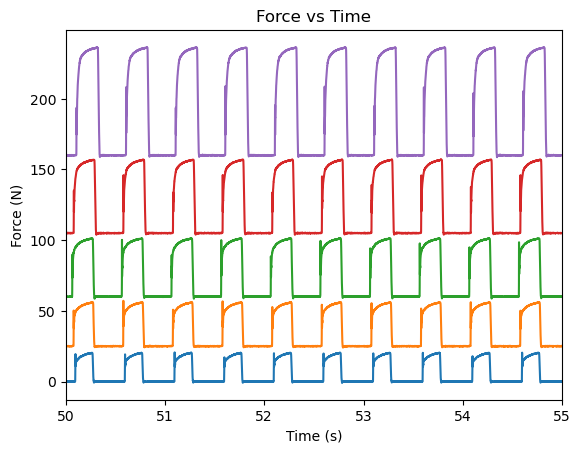

In [142]:
# Create the plot
plt.figure()

plt.plot(force_df_['t_20N2Hz']+0.125, force_df_['F_20N2Hz'], label='20N')
plt.plot(force_df_['t_30N2Hz'], force_df_['F_30N2Hz']+25, label='30N')
plt.plot(force_df_['t_40N2Hz']-.2, force_df_['F_40N2Hz']+35+25, label='40N')
plt.plot(force_df_['t_50N2Hz'], force_df_['F_50N2Hz']+45+35+25, label='50N')
plt.plot(force_df_['t_75N2Hz']-0.2, force_df_['F_75N2Hz']+55+45+35+25, label='75N')

# Add labels and title
plt.xlabel('Time (s)')
plt.ylabel('Force (N)')
plt.xlim(50, 55)
plt.title('Force vs Time')

Let's create another datraframe for the frequency files using a similar method.

In [96]:
freq_df = pd.DataFrame()

# Loop through each CSV file and append it to the combined DataFrame
for file in freq_files:
    # 1 - construct a new file path through each iteration
    file_path = os.path.join(csv_directory, file)
    
    # 2 - import the content to a temporary dataframe temp_def
    temp_df = pd.read_csv(file_path, header=None)
        # note 2.2: using "header=None" to solve problem number 2 - csv with no original headers
    temp_df = temp_df.drop(temp_df.columns[0], axis=1)
        # note 2.1: using .drop() to solve problem number 1 - duplicate index in dataframe
    
    # 3 - rename the headers
    temp_df.columns = temp_df.columns.astype(str)
    temp_df.columns = [f"t_{file.split('.')[0]}", f"F_{file.split('.')[0]}"]
    
    
    # 4 - combine the data into the final dataframme                                  
    freq_df = pd.concat([freq_df, temp_df], axis=1)
    
freq_df

,t_30N05Hz,F_30N05Hz,t_30N1Hz,F_30N1Hz,t_30N2Hz,F_30N2Hz,t_30N3Hz,F_30N3Hz
0,0.00082,-0.2,0.00082,-0.2,0.00082,0.0,0.00082,25.7
1,0.00164,-0.2,0.00164,-0.1,0.00164,0.1,0.00164,22.8
2,0.00246,-0.1,0.00246,0.0,0.00246,0.0,0.00246,19.7
3,0.00328,-0.1,0.00328,0.0,0.00328,-0.1,0.00328,17.0
4,0.00410,-0.2,0.00410,0.0,0.00409,0.1,0.00410,14.6
...,...,...,...,...,...,...,...,...
280995,234.16280,-0.1,NaN,NaN,NaN,NaN,NaN,NaN
280996,234.16360,-0.1,NaN,NaN,NaN,NaN,NaN,NaN
280997,234.16440,0.0,NaN,NaN,NaN,NaN,NaN,NaN
280998,234.16530,-0.3,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
freq_df_ = freq_df[0:230000]
freq_df_

,t_30N05Hz,F_30N05Hz,t_30N1Hz,F_30N1Hz,t_30N2Hz,F_30N2Hz,t_30N3Hz,F_30N3Hz
0,0.00082,-0.2,0.00082,-0.2,0.00082,0.0,0.00082,25.7
1,0.00164,-0.2,0.00164,-0.1,0.00164,0.1,0.00164,22.8
2,0.00246,-0.1,0.00246,0.0,0.00246,0.0,0.00246,19.7
3,0.00328,-0.1,0.00328,0.0,0.00328,-0.1,0.00328,17.0
4,0.00410,-0.2,0.00410,0.0,0.00409,0.1,0.00410,14.6
...,...,...,...,...,...,...,...,...
229995,191.67210,-0.2,191.62450,0.0,191.65190,0.0,191.62550,-0.1
229996,191.67290,0.1,191.62540,0.1,191.65270,0.2,191.62630,-0.2
229997,191.67370,0.1,191.62620,0.0,191.65350,0.0,191.62720,-0.1
229998,191.67450,-0.1,191.62710,-0.1,191.65440,0.1,191.62800,-0.2


### Ploting the force profile of PFAM using 30 N and frequencies from 0,5 Hz to 3 Hz

Text(0.5, 1.0, 'Force vs Time')

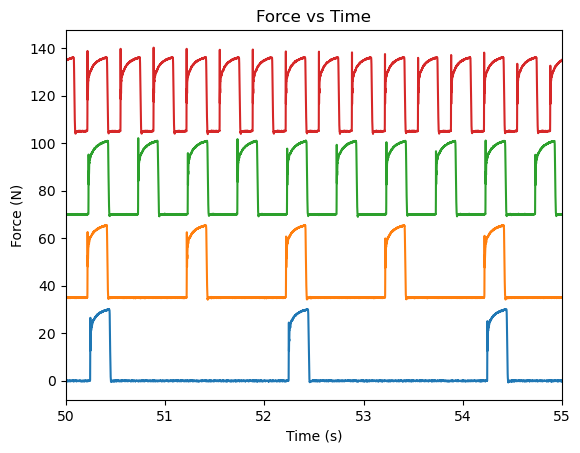

In [137]:
# Create the plot
plt.figure()

plt.plot(freq_df_['t_30N05Hz']-1.1, freq_df_['F_30N05Hz'], label='30N05Hz')
plt.plot(freq_df_['t_30N1Hz'], freq_df_['F_30N1Hz']+35, label='30N1Hz')
plt.plot(freq_df_['t_30N2Hz']+.15, freq_df_['F_30N2Hz']+70, label='30N2Hz')
plt.plot(freq_df_['t_30N3Hz']+.1, freq_df_['F_30N3Hz']+105, label='30N3Hz')

# Add labels and title
plt.xlabel('Time (s)')
plt.ylabel('Force (N)')
plt.xlim(50, 55)
plt.title('Force vs Time')